In [18]:

#1. Import libraries & data

In [19]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('InputData/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [22]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [24]:
def func(row):
    if row['age'] < 21:
        return 'Children'
    elif row['age'] >21 and row['age']< 61:
        return 'Adult' 
    else:
        return 'senier citi'

df['age_group'] = df.apply(func, axis=1)

In [25]:
cols_w_diff_categories= ['sex', 'children', 'smoker', 'region']
count_of_categories= ['sex', 'region','age_group']
cols_w_values= ['age', 'bmi', 'charges']


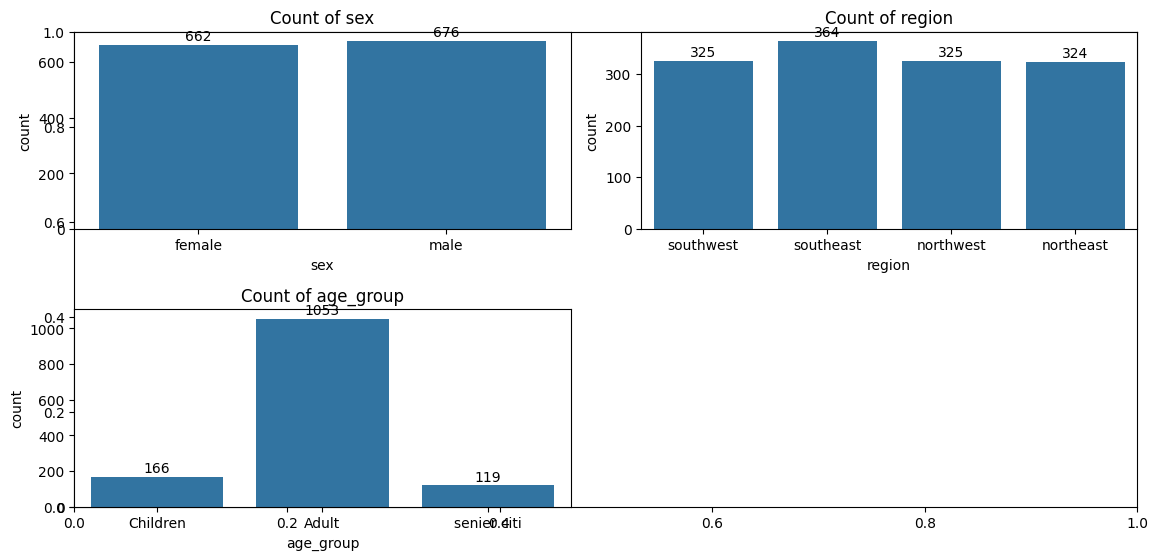

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))

for i, col in enumerate(count_of_categories, 1):
    
    ax = plt.subplot(2, 2, i)
    
    sns.countplot(x=df[col].astype('object'), ax=ax)
    plt.title(f'Count of {col}')
    
    for c in ax.containers:
        ax.bar_label(c, fmt='%d', padding=1)
        
    # ax.remove() 

plt.tight_layout()
plt.show()

# Explicitly close the figure to remove overlapping axes
plt.close(fig)

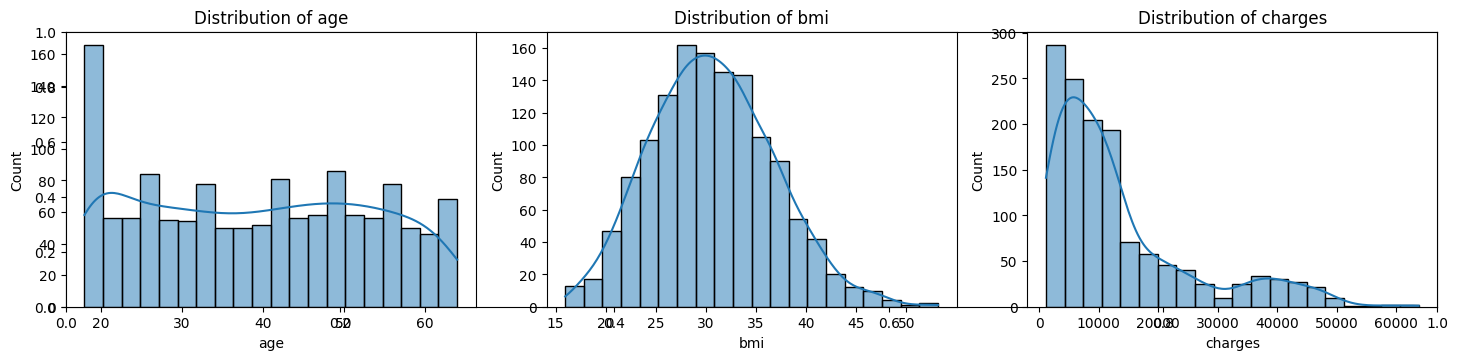

In [27]:
### number of unique elements > 6
fig, ax = plt.subplots(figsize=(15, 4))

for i, col in enumerate(cols_w_values, 1):
    plt.subplot(1, 3, i)
    sns.histplot(x=df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

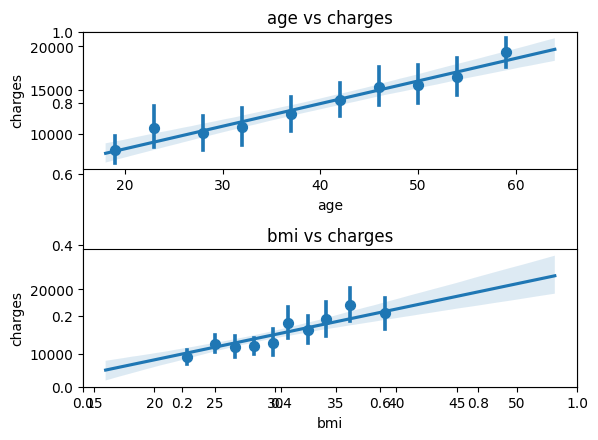

In [28]:
### number of unique elements > 6
# box plot of 'charges' & other variables
fig, ax = plt.subplots()

charges_vs_categories = [col for col in cols_w_values if col != 'charges']

for i, col in enumerate(charges_vs_categories, 1):
    plt.subplot(2, 1, i)

    ax = sns.regplot(data=df, x=df[col], y='charges', x_bins=10)
    plt.title(f'{col} vs charges')

plt.tight_layout()
plt.show()